1 - Se denomina sesgo de un estimador a la diferencia entre la esperanza (valor esperado) del estimador y el verdadero valor del parámetro a estimar.

2 - Un estimador es asintóticamente insesgado si su posible sesgo tiende a 0 al aumentar el tamaño muestral.

3 - Un estimador es consistente si es asintóticamente insesgado y que además su varianza tienda a 0 al aumentar el tamaño muestral.

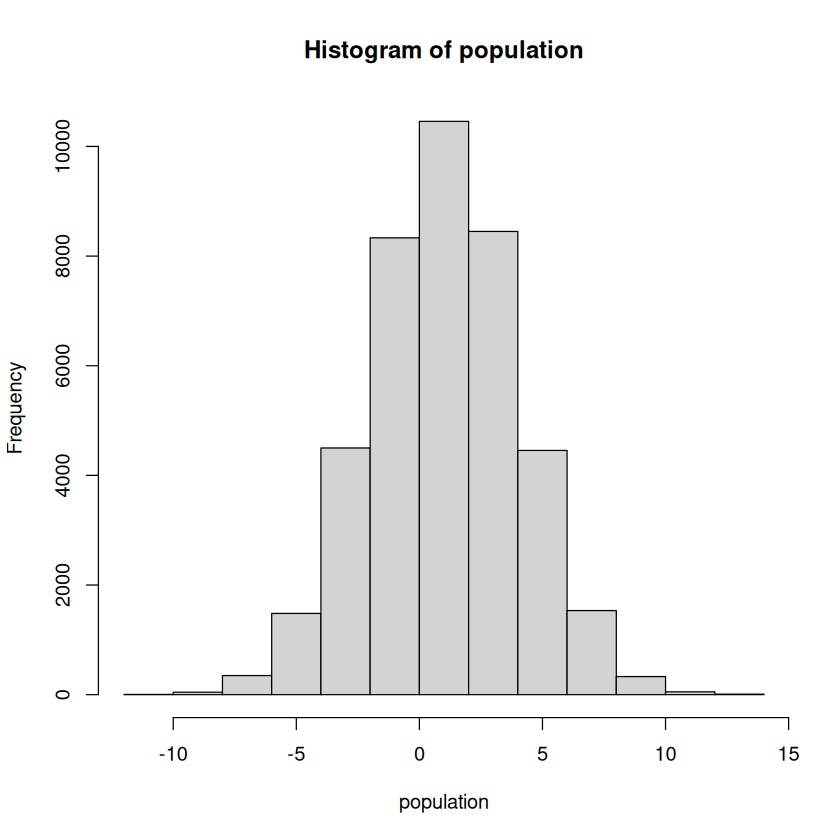

In [56]:
proposed_mean <- 1
proposed_sd <- 3

population <- rnorm(n = 40000, mean = proposed_mean, sd = proposed_sd)
hist(population)

In [57]:
number_observations <- 10
sample_size <- 20
samples <- list()
for (i in 1:number_observations) {
  samples[[i]] <- sample(population, sample_size)
}


In [58]:
get_sesgo <- function(actual_value, estimator, sampleS)
{
    sesgo <-  mean(sapply(sampleS, estimator)) - actual_value 
    return(sesgo)
}

In [59]:
get_variance <- function(estimator, sampleS)
{
    mean_estimator <- mean(sapply(sampleS, estimator))
    variance <- mean(
        sapply(
            sapply(sampleS, estimator),
            function(x) (x - mean_estimator)^2
        )
    )
    
    return(variance)
}

## Estimador $\hat{X} = \frac{1}{n}\sum_{i = 1}^n x_i$

En el caso de usar como estimador a la media no tiene sesgo porque:

\begin{align*}
E[\hat{X}] &= E[\frac{1}{n}\sum_{i = 1}^{n} x_i] \\
           &= \frac{1}{n}E[\sum_{i = 1}^{n} x_i] \\
           &= \mu
\end{align*}

\begin{align*}
b(\hat{X}) &= E[\hat{X}] - X \\
           &= \mu - \mu \\
           &= 0
\end{align*}

Pero eso está duro porque eso means que el sesgo no depende de neither la cantidad de observaciones ni de el sample_size.

In [60]:
actual_value_mean <- get_sesgo(proposed_mean, function(x) mean(x), samples)
expected_value_mean <- 0

print(actual_value_mean)
print(expected_value_mean)

[1] -0.0345392
[1] 0


Por tanto es insesgado, para saber si es consistente, es necesario calcular la varianza de el estimador en función de el sample_size.

La varianza es el cuadrado de la desviación estándar, es calculada para un estimador $\hat{X}$:

$$v(\hat{X}) \stackrel{:}{=} E[(\hat{X} - E[\hat{X}])²]$$  


In [61]:
actual_value_variance <- get_variance(function(x) mean(x), samples)
expected_value_variance <- proposed_sd^2 / sample_size

print(actual_value_variance)

print(expected_value_variance)

[1] 0.4030153
[1] 0.45


El cálculo parece indicar que aumentando el tamaño de el sample_size el valor de la varianza tiende a 0, lo que significa que el estimador "mean" es consistente. 

La fórmula anterior de la varianza no es de mucha ayuda, por otro lado como los $x_i$ son variables independientes entre sí, puedo afirmar que la varianza es linear. Por lo que quedaría:

\begin{align*}

v(\hat{X}) &= v(\frac{1}{n} \sum_{i = 1}^n x_i) \\
           &= \frac{1}{n^2} \sum_{i = 1}^n v(x_i) \\
           &= \frac{ \sigma^2}{n} 

\end{align*}

## Estimador  $\hat{\theta} = \frac{1}{n^2}\sum_{i = 1}^{n} x_i$

Con respecto a el estimador: $\hat{\theta} = \frac{1}{n^2}\sum_{i = 1}^{n} x_i$ posee sesgo:

$b(\hat{\theta}) = \mu ( \frac{1}{n} - 1)$

Que converge a $-\mu$, por lo que no es asintóticamente insesgado.

In [62]:
actual_value_est2 <- get_sesgo(
    proposed_mean, 
    function(x) mean(x) / length(x), 
    samples
)
expected_value_est2 <- proposed_mean * (1 / sample_size - 1)

print(actual_value_est2)
print(expected_value_est2)

[1] -0.951727
[1] -0.95


In [63]:
actual_variance_est2 <- get_variance(function(x) mean(x) / length(x), samples)
expected_variance_est2 <- proposed_sd^2 / sample_size^3

print(actual_variance_est2)
print(expected_variance_est2)

[1] 0.001007538
[1] 0.001125


La varianza converge a $0$, para ser consistente es necesario también que no tenga sesgo asintóticamente pero lo posee. Por tanto no es consistente.

Para comparar la eficacia de estos dos estimadores se usa el error cuadrático medio que es:

$ECM[\hat{\theta}] = v(\hat{\theta}) + b(\hat{\theta})^2$

El primer estimador es más eficiente porque su error cuadrático solamente depende de la varianza y esta converge a 0, el segundo posee no es asintóticamente insesgado y la varianza tiende a $0$.

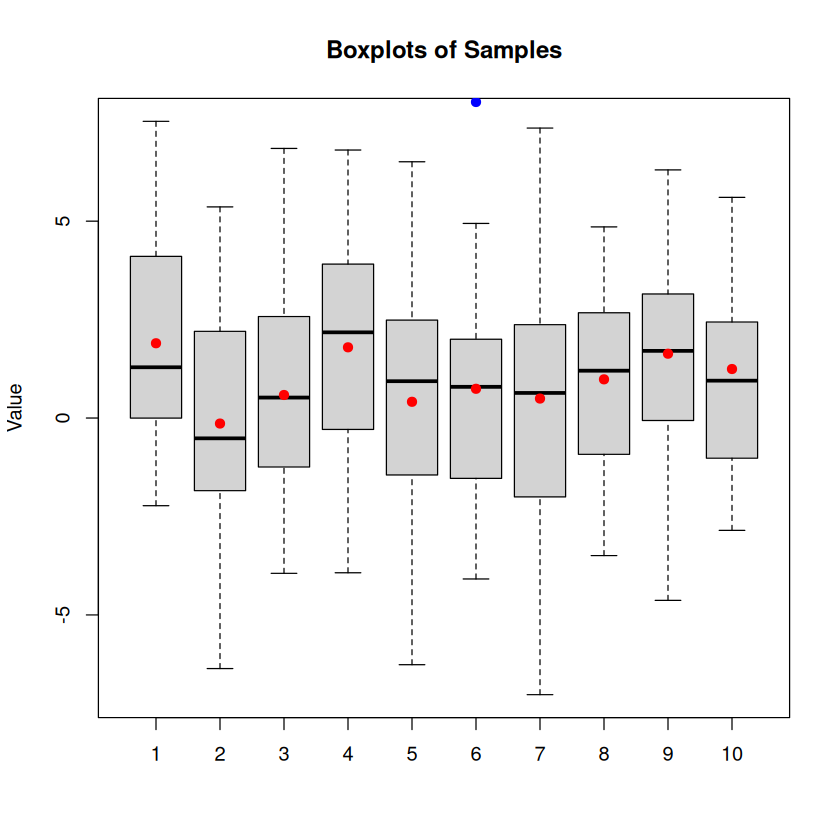

In [64]:
# Assuming 'samples' is your data.
boxplot(samples, main = "Boxplots of Samples", ylab = "Value", outline = FALSE)
for (i in 1:length(samples)) {
  points(i, mean(samples[[i]]), col = "red", pch = 19)
}

for (i in 1:length(samples)) {
  bp_stats <- boxplot.stats(samples[[i]])
  points(rep(i, length(bp_stats$out)), bp_stats$out, col = "blue", pch = 19)
}


In [83]:
visualize_mse_by_size <- function(
  sample_size, 
  number_observations, 
  estimator, 
  population, 
  real_value, 
  title) {
  
  mse_values <- sapply(sample_size, function(size) {
  samplesss <- list()
  for (i in 1:number_observations) {
    samplesss[[i]] <- sample(population, size)
  }
  return(
        get_variance(estimator, samplesss)
      + get_sesgo(real_value, estimator, samplesss)^2
  )
})

# Create plot
plott <- plot(
  sample_size,
  mse_values,
  type = "b", main = title, xlab = "Sample Size", ylab = "MSE"
)
return(plott)
}

NULL

NULL

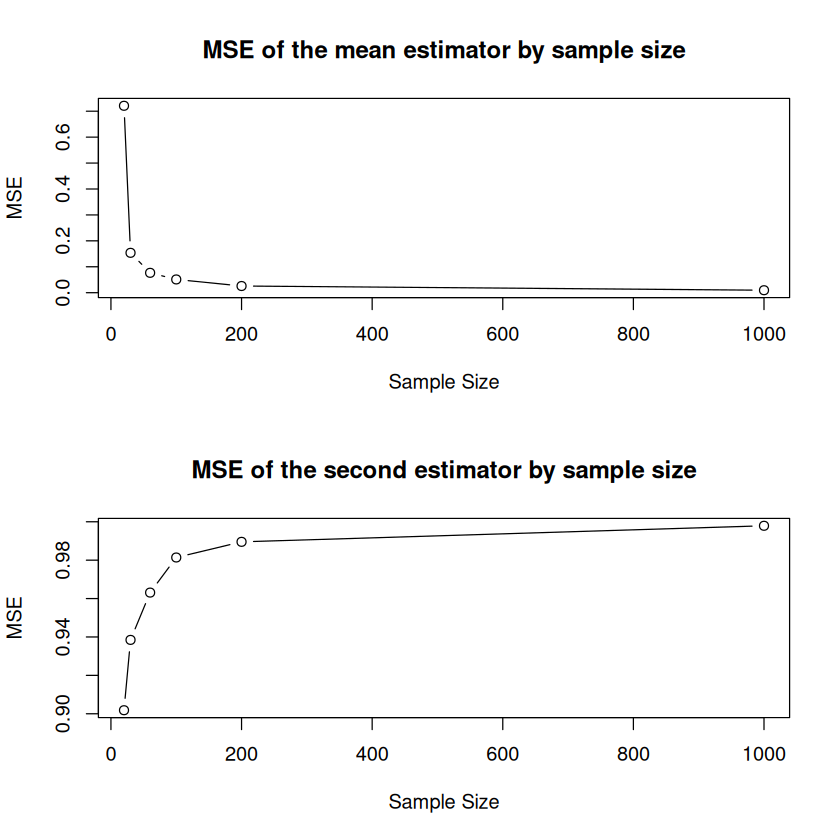

In [91]:
sample_size <- c(20, 30, 60, 100, 200, 1000)
par(mfrow = c(2, 1))
visualize_mse_by_size(
    sample_size, 
    number_observations, 
    function(x) mean(x), 
    population, 
    proposed_mean, 
    "MSE of the mean estimator by sample size"
)

visualize_mse_by_size(
    sample_size, 
    number_observations, 
    function(x) mean(x) / length(x), 
    population, 
    proposed_mean, 
    "MSE of the second estimator by sample size"
)